# **2.1 Feature Engineering**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
movies = pd.read_csv('movie.csv')
ratings = pd.read_csv('rating.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')

# Display the first few rows of each file to understand the structure
print("Movies:")
print(movies.head())
print("\nRatings:")
print(ratings.head())
print("\nGenome Scores:")
print(genome_scores.head())
print("\nGenome Tags:")
print(genome_tags.head())


Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40

Genome Scores:
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02

In [2]:
# Calculate average rating for each movie
movie_avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
movie_avg_ratings.rename(columns={'rating': 'ratings_avg'}, inplace=True)

# Merge the average ratings back to the movies DataFrame
movies = movies.merge(movie_avg_ratings, on='movieId', how='left')

print("Movies with average ratings:")
print(movies.head())


Movies with average ratings:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  ratings_avg  
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240  
1                   Adventure|Children|Fantasy     3.211977  
2                               Comedy|Romance     3.151040  
3                         Comedy|Drama|Romance     2.861393  
4                                       Comedy     3.064592  


In [3]:
# Split genres into binary features
genre_columns = movies['genres'].str.get_dummies(sep='|')

# Add the genre columns to the movies DataFrame
movies = pd.concat([movies, genre_columns], axis=1)

print("Movies with genre features:")
print(movies.head())

Movies with genre features:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  ratings_avg  \
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240   
1                   Adventure|Children|Fantasy     3.211977   
2                               Comedy|Romance     3.151040   
3                         Comedy|Drama|Romance     2.861393   
4                                       Comedy     3.064592   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  ...  \
0                   0       0          1          1         1       1  ...   
1                   0       0          1          0         1       0  ...   
2                   0       0          0          0       

In [4]:
# Merge genome_scores with genome_tags to get tag names
genome_data = genome_scores.merge(genome_tags, on='tagId', how='left')

# Find the most relevant tag for each movie
relevant_tags = genome_data.loc[genome_data.groupby('movieId')['relevance'].idxmax()]
relevant_tags = relevant_tags[['movieId', 'tag']].rename(columns={'tag': 'relevant_genome_tag'})

# Merge the relevant tags back to the movies DataFrame
movies = movies.merge(relevant_tags, on='movieId', how='left')

print("Movies with relevant tags:")
print(movies.head())

Movies with relevant tags:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  ratings_avg  \
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240   
1                   Adventure|Children|Fantasy     3.211977   
2                               Comedy|Romance     3.151040   
3                         Comedy|Drama|Romance     2.861393   
4                                       Comedy     3.064592   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  ...  \
0                   0       0          1          1         1       1  ...   
1                   0       0          1          0         1       0  ...   
2                   0       0          0          0        

In [5]:
# Calculate the number of ratings for each movie
movie_num_ratings = ratings.groupby('movieId')['rating'].count().reset_index()
movie_num_ratings.rename(columns={'rating': 'num_ratings'}, inplace=True)

# Merge the number of ratings back to the movies DataFrame
movies = movies.merge(movie_num_ratings, on='movieId', how='left')

print("Movies with number of ratings:")
print(movies.head())

Movies with number of ratings:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  ratings_avg  \
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240   
1                   Adventure|Children|Fantasy     3.211977   
2                               Comedy|Romance     3.151040   
3                         Comedy|Drama|Romance     2.861393   
4                                       Comedy     3.064592   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  ...  \
0                   0       0          1          1         1       1  ...   
1                   0       0          1          0         1       0  ...   
2                   0       0          0          0    

In [7]:
# Load tags data
tags = pd.read_csv('tag.csv')

# Find the most common tag for each movie
common_tags = tags.groupby('movieId')['tag'].agg(lambda x: x.value_counts().index[0]).reset_index()
common_tags.rename(columns={'tag': 'common_user_tag'}, inplace=True)

# Merge the common tags back to the movies DataFrame
movies = movies.merge(common_tags, on='movieId', how='left')

print("Movies with common user tags:")
print(movies.head())

Movies with common user tags:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  ratings_avg  \
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240   
1                   Adventure|Children|Fantasy     3.211977   
2                               Comedy|Romance     3.151040   
3                         Comedy|Drama|Romance     2.861393   
4                                       Comedy     3.064592   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  ...  \
0                   0       0          1          1         1       1  ...   
1                   0       0          1          0         1       0  ...   
2                   0       0          0          0     

In [8]:
# Select relevant columns for clustering
final_data = movies[['movieId', 'ratings_avg', 'num_ratings', 'relevant_genome_tag', 'common_user_tag'] + list(genre_columns.columns)]

# Display the final data for clustering
print("Final Data for Clustering:")
print(final_data.head())


Final Data for Clustering:
   movieId  ratings_avg  num_ratings relevant_genome_tag common_user_tag  \
0        1     3.921240      49695.0                toys           Pixar   
1        2     3.211977      22243.0           adventure  Robin Williams   
2        3     3.151040      12735.0         good sequel           moldy   
3        4     2.861393       2756.0               women     chick flick   
4        5     3.064592      12161.0         good sequel    steve martin   

   (no genres listed)  Action  Adventure  Animation  Children  ...  Film-Noir  \
0                   0       0          1          1         1  ...          0   
1                   0       0          1          0         1  ...          0   
2                   0       0          0          0         0  ...          0   
3                   0       0          0          0         0  ...          0   
4                   0       0          0          0         0  ...          0   

   Horror  IMAX  Musical  Mys

In [13]:
# Add a new feature: Length of the movie title
movies['title_length'] = movies['title'].apply(len)

# Include this feature in the final dataset
final_data['title_length'] = movies['title_length']

C:\Users\User\AppData\Local\Temp\ipykernel_10180\1795374434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['title_length'] = movies['title_length']


In [9]:
# Another new feature
movies['num_genres'] = movies['genres'].apply(lambda x: len(x.split('|')))

# Include this feature in the final dataset
final_data['num_genres'] = movies['num_genres']

C:\Users\User\AppData\Local\Temp\ipykernel_10180\772175950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['num_genres'] = movies['num_genres']


In [10]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  ratings_avg  \
0  Adventure|Animation|Children|Comedy|Fantasy     3.921240   
1                   Adventure|Children|Fantasy     3.211977   
2                               Comedy|Romance     3.151040   
3                         Comedy|Drama|Romance     2.861393   
4                                       Comedy     3.064592   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  ...  \
0                   0       0          1          1         1       1  ...   
1                   0       0          1          0         1       0  ...   
2                   0       0          0          0         0       1  ...   
3       

In [11]:
# Another new feature
movies['avg_rating_per_genre'] = movies.groupby('genres')['ratings_avg'].transform('mean')

# Include this feature in the final dataset
final_data['avg_rating_per_genre'] = movies['avg_rating_per_genre']

C:\Users\User\AppData\Local\Temp\ipykernel_10180\1878254741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['avg_rating_per_genre'] = movies['avg_rating_per_genre']


We achieved more than eight features because we represented each genre as a separate binary feature. Since movies can belong to multiple genres, each unique genre contributes a separate column. Additionally, we included other derived features such as the number of ratings, average rating, most relevant genome tag, most common user tag, title length, and more. Together, these exceed eight features, allowing for a more robust clustering analysis.

# **2.2 Choose your features (variables)!**

**Standardize the data**

Clustering algorithms, such as K-means, are sensitive to the scale of features. If some features (e.g., num_ratings) have a larger range of values, they will dominate over features with smaller ranges (e.g., ratings_avg), which can distort the results.

We standardize any numerical features, even the boolean ones about the genres, to ensure all features contribute equally to the outcome. It's the correct way in order to get a good clustering, and most of all, a good reduction of features using the Principal Component Analysis.

We will use StandardScaler from the sklearn library to standardize the data (bringing the mean to 0 and the standard deviation to 1).

In [14]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select numeric features for normalization
numeric_features = ['ratings_avg', 'num_ratings']
categorical_features = ['relevant_genome_tag', 'common_user_tag']
genre_features = list(genre_columns)
additional_features = ['title_length', 'num_genres', 'avg_rating_per_genre']

# Combine all features for clustering
final_features = numeric_features + genre_features + additional_features
data_for_clustering = final_data[final_features]

# Step 2: Standardize numeric features
scaler = StandardScaler()
data_for_clustering[numeric_features] = scaler.fit_transform(data_for_clustering[numeric_features])
data_for_clustering[additional_features] = scaler.fit_transform(data_for_clustering[additional_features])
data_for_clustering[genre_features] = scaler.fit_transform(data_for_clustering[genre_features])

C:\Users\User\AppData\Local\Temp\ipykernel_10180\2395997406.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering[numeric_features] = scaler.fit_transform(data_for_clustering[numeric_features])
C:\Users\User\AppData\Local\Temp\ipykernel_10180\2395997406.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering[additional_features] = scaler.fit_transform(data_for_clustering[additional_features])
C:\Users\User\AppData\Local\Temp\ipykernel_10180\2395997406.py:17: SettingWithCo

In [37]:
data_for_clustering

,ratings_avg,num_ratings,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title_length,num_genres,avg_rating_per_genre
0,1.186678,15.862267,-0.095396,-0.384916,3.272969,5.055775,4.790520,1.502486,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,-0.825725,2.894060,0.499517
1,0.118627,6.965919,-0.095396,-0.384916,3.272969,-0.197794,4.790520,-0.665564,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,-0.964787,0.968217,-0.669567
2,0.026865,3.884669,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,-0.347495,-0.315609,...,-0.198692,-0.242413,2.368469,-0.261265,-0.425283,-0.213951,-0.15941,-0.339010,0.005295,-0.222714
3,-0.409303,0.650782,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,-0.347495,-0.315609,...,-0.198692,-0.242413,2.368469,-0.261265,-0.425283,-0.213951,-0.15941,-0.269479,0.968217,0.569787
4,-0.103315,3.698653,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,0.425828,-0.957627,-0.578681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,1.305280,-0.242028,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,0.008644,-0.957627,-0.578681
27274,1.305280,-0.242028,-0.095396,-0.384916,-0.305533,-0.197794,-0.208746,1.502486,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,0.078174,-0.957627,-0.578681
27275,-0.953511,-0.242028,-0.095396,-0.384916,3.272969,-0.197794,-0.208746,-0.665564,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,-0.686664,-0.957627,-0.807723
27276,-0.200581,-0.242028,10.482661,-0.384916,-0.305533,-0.197794,-0.208746,-0.665564,-0.347495,-0.315609,...,-0.198692,-0.242413,-0.422214,-0.261265,-0.425283,-0.213951,-0.15941,-0.617133,-0.957627,-1.202975


**Dimensionality Reduction**

If we have too many features, it can increase computational complexity and make interpreting the results more challenging.
We will use PCA (Principal Component Analysis) to reduce the number of features while preserving the most important information. PCA will decrease the number of features, preparing the data for the next clustering task.

In order to have a good application of the PCA algorithm, we have already standardized the variables, now we need to check if there are any Nan values and substitute them with the median values.

In [18]:
print(data_for_clustering.isnull().sum())

ratings_avg             534
num_ratings             534
(no genres listed)        0
Action                    0
Adventure                 0
Animation                 0
Children                  0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
IMAX                      0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
title_length              0
num_genres                0
avg_rating_per_genre     13
dtype: int64


In [19]:
data_for_clustering['ratings_avg'].fillna(data_for_clustering['ratings_avg'].median(), inplace=True)
data_for_clustering['num_ratings'].fillna(data_for_clustering['num_ratings'].median(), inplace=True)
data_for_clustering['avg_rating_per_genre'].fillna(data_for_clustering['avg_rating_per_genre'].median(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_10180\3775457145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_for_clustering['ratings_avg'].fillna(data_for_clustering['ratings_avg'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10180\3775457145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering[

In [20]:
print(data_for_clustering.isnull().sum())

ratings_avg             0
num_ratings             0
(no genres listed)      0
Action                  0
Adventure               0
Animation               0
Children                0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Fantasy                 0
Film-Noir               0
Horror                  0
IMAX                    0
Musical                 0
Mystery                 0
Romance                 0
Sci-Fi                  0
Thriller                0
War                     0
Western                 0
title_length            0
num_genres              0
avg_rating_per_genre    0
dtype: int64


In [59]:
from sklearn.decomposition import PCA

# Step 3: Perform dimensionality reduction using PCA
pca = PCA(n_components=10, random_state=95)  # Reduce to 10 components for simplicity
pca_data = pca.fit_transform(data_for_clustering)

# Step 4: Analyze explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio by each PCA component: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

# Step 5: Save transformed data
data_pca = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

print("Transformed data after PCA:")
print(data_pca.head())

Explained variance ratio by each PCA component: [0.10901253 0.0849487  0.07940156 0.05953667 0.0521747  0.04609357
 0.04457859 0.04173851 0.04074593 0.03936175]
Cumulative explained variance: [0.10901253 0.19396123 0.27336279 0.33289946 0.38507416 0.43116773
 0.47574632 0.51748483 0.55823076 0.5975925 ]
Transformed data after PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  6.338031  6.513417  5.188906  0.941983  1.119487  2.061755  0.481354   
1  4.049077  2.720351  3.364316  0.916289  0.257497  0.075037  0.528663   
2  0.170036  0.366441  0.723553 -1.991668 -0.596267  2.057143 -0.700304   
3 -0.408367  1.118672  0.132464 -2.537941 -0.529649  0.428811 -0.657398   
4 -0.053986 -0.741937  0.888675 -0.472669 -0.248203  1.590171  0.151381   

        PC8       PC9      PC10  
0  5.543999 -3.404697  6.513153  
1  3.656659 -0.941339  3.208564  
2  1.022876 -1.151560  0.891646  
3  0.120312 -0.460397 -0.198487  
4  0.665590 -1.737222  1.370356  


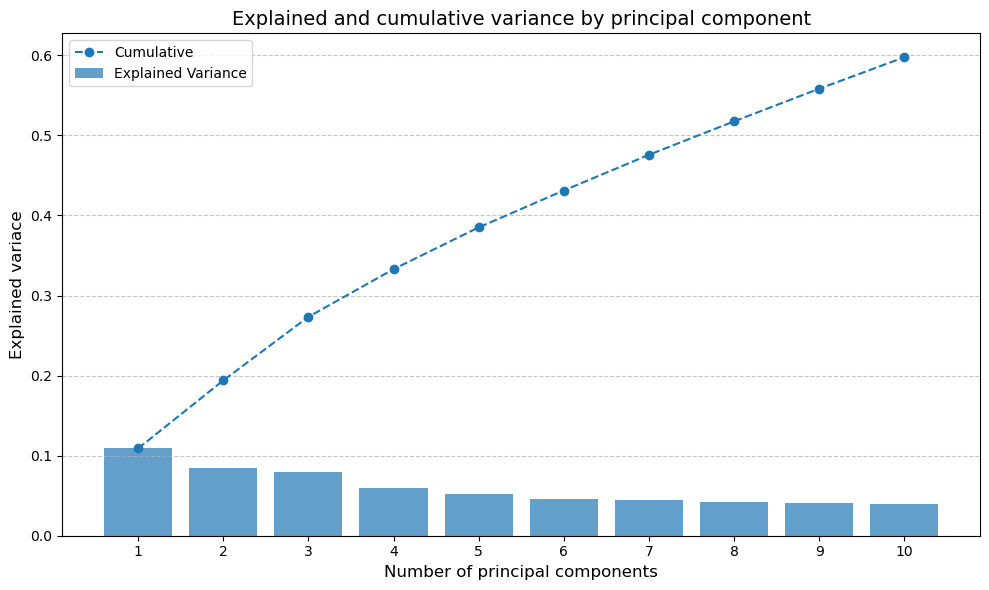

In [60]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) 

# Visualizing in a graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance')

plt.title('Explained and cumulative variance by principal component', fontsize=14)
plt.xlabel('Number of principal components', fontsize=12)
plt.ylabel('Explained variace', fontsize=12)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We have implemented the results of our PCA algorithm. As we could expect, having an high-dimensional dataset and having standardized all the variables, so that they all have the same weight regarding the variance to be explained, it is very complicated to summarize all the information of the dataset in a few principal components. When choosing the number of principal components we see in which the explained variance decreases less than in the previous ones. To have an acceptable value of explained variance, but still obtaining a significant reduction in dimensions, we can use 5 principal components, which explain about 40% of the dataset.

Now we can check for these 5 main components, how much the variables have influenced their creation. In this way we can realize if all the variables are present in our 5 main components, or if some are not well represented.

Loadings (incidence of variables for each PC):
                           PC1       PC2       PC3       PC4       PC5  \
ratings_avg          -0.204244  0.315975 -0.016018  0.137759  0.046617   
num_ratings           0.115747  0.149509 -0.017328  0.033212 -0.106066   
(no genres listed)   -0.017359 -0.142972  0.035828  0.027308 -0.027094   
Action                0.305271  0.090842 -0.086803  0.191895 -0.394763   
Adventure             0.276142  0.215029  0.203795  0.170553 -0.211330   
Animation             0.181690  0.185149  0.328667  0.108666  0.265537   
Children              0.204792  0.133061  0.358885 -0.006599  0.266457   
Comedy                0.052728 -0.045378  0.243599 -0.481041  0.062254   
Crime                 0.109030  0.159596 -0.356239 -0.015124  0.227178   
Documentary          -0.229960 -0.029186  0.125221  0.473085  0.186448   
Drama                -0.207904  0.323303 -0.265883 -0.170287 -0.164099   
Fantasy               0.219284  0.168222  0.215317  0.033901  0.1

<Figure size 1000x600 with 0 Axes>

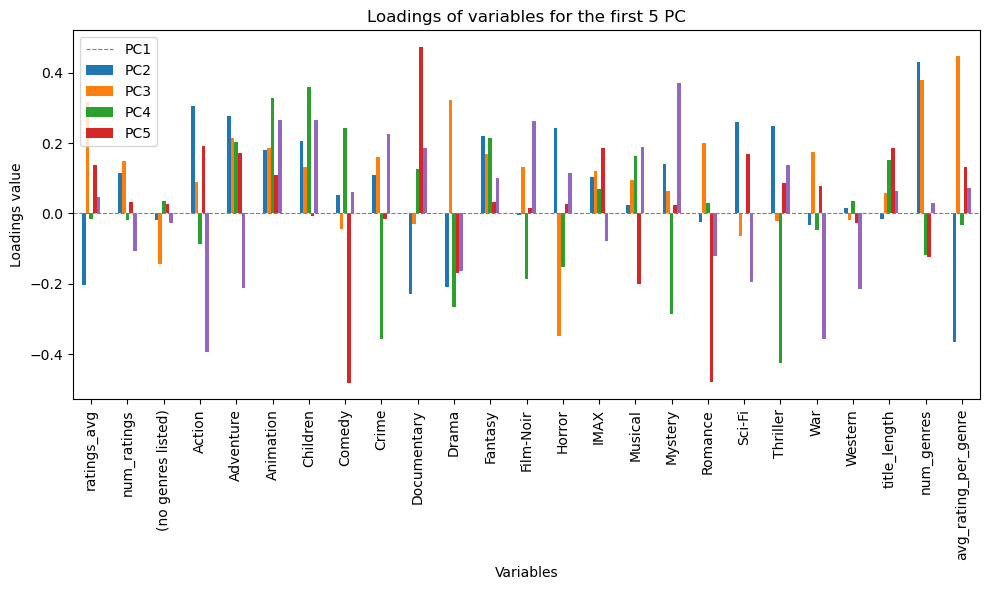

In [61]:
import matplotlib.pyplot as plt
# Compute the loadings
loadings = pd.DataFrame(
    pca.components_.T,  
    columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])],
    index = data_for_clustering.columns
)

# Print loadings
print("Loadings (incidence of variables for each PC):")
print(loadings)
num_cp = 5
# Visualization of loadings fro the first 2 principal components
plt.figure(figsize=(10, 6))
loadings.iloc[:, :num_cp].plot(kind='bar', figsize=(10, 6))
plt.title("Loadings of variables for the first 5 PC")
plt.xlabel("Variables")
plt.ylabel("Loadings value")
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend([f"PC{i+1}" for i in range(num_cp)])
plt.tight_layout()
plt.show()

After all this analysis we can choose definetly the optimal number of principal components, in that case, a good number of components can be 5. The first reason is that between the 5th and the 6th compontent there is the last decrease of explained variance, even if its tiny in that contex is enough. Last reason is that with 5 PC we manage to have the 40% of the variance explained. As we already said it's a quite low value, but it's quite normal working with a very big number of features, most of which have no internal correlations. For this reason, when applying a dimensional reduction it is almost mandatory to lose a large part of the information. 5 principal components is a good compromise having an acceptable information retained, still obtaining a great dimensional reduction of the dataset, facilitating the work in cluster analysis. Moreover, looking at the Loadings of the variables for the first 5 PC, we can see that almost all the variables are important in the definition of at least one prncipal component. This ensures that a portion of information for each variable will be retained thanks to the Principal Component Analysis.

In [62]:
# Using PCA for the reduction with the choosen number of PC
pca = PCA(n_components=5, random_state=95)  
pca_data = pca.fit_transform(data_for_clustering)

# Save transformed data
data_pca = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# **2.3 Clustering**

**Optimal number of clusters**

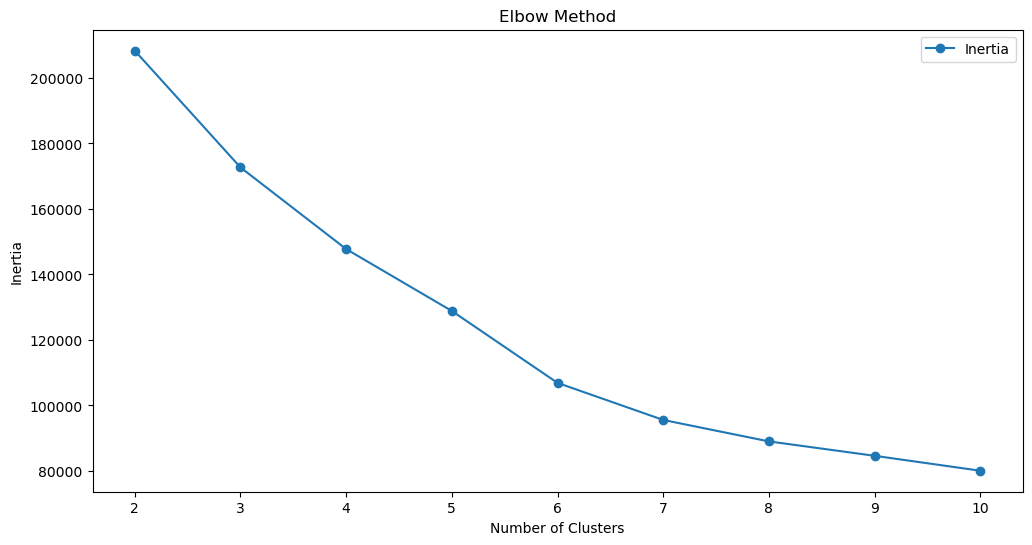

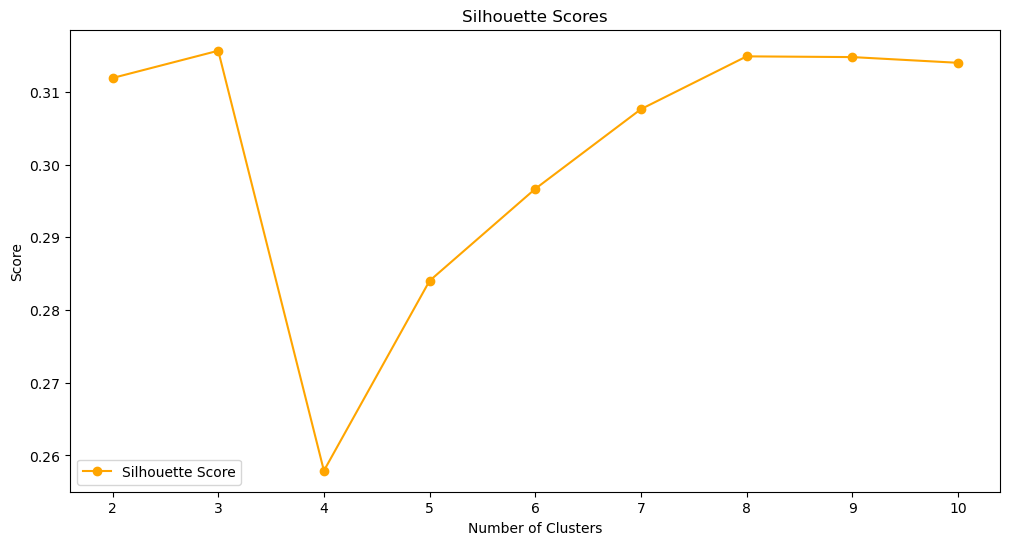

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()


**Elbow Method:**

In the Elbow Method graph, to find a good number of groups you have to see in which part of the graph there is a decrease in the variation of inertia between one k and another. From k = 2 to k = 3, the inertia decreases by about 300 000, from K = 3 to K = 4 there is a decrease of 200 000. K = 3 could be a good number of clusters, and this will also be confirmed by the Silhouette Scores graph.

**Silhouette Scores:**

The peak of the Silhouette value is reached at K = 3, after that value there is a sharp drop, with an increase in the score that will return to values ​​above 0.31 only after k = 8. Without taking a too large number of clusters k = 3 seems to be the best choice.


**K-means**

In [49]:
import numpy as np

# Initialize cluster centers randomly
def initialize_centers(data, k):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[random_indices]

# Assign points to the nearest cluster center
def assign_clusters(data, centers):
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    return np.argmin(distances, axis=1)

# Update cluster centers
def update_centers(data, labels, k):
    new_centers = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centers

# K-means algorithm using MapReduce logic
def kmeans(data, k, max_iters=100, tol=1e-4):
    centers = initialize_centers(data, k)
    for i in range(max_iters):
        labels = assign_clusters(data, centers)
        new_centers = update_centers(data, labels, k)

        # Check for convergence
        if np.all(np.abs(new_centers - centers) < tol):
            print(f"Converged at iteration {i}")
            break
        centers = new_centers
    return centers, labels

# Run K-means with chosen k
k = 3  # Set the number of clusters (from elbow method)
data = data_pca.values  # Convert PCA-transformed data to NumPy array

centers, labels = kmeans(data, k)

# Output results
print("Final cluster centers:")
print(centers)


Converged at iteration 20
Final cluster centers:
[[-0.95002753  0.05147376  0.1985467  -0.15405229 -0.13922587]
 [ 2.57691605  1.49966335  2.01077456  0.55291946 -0.00770608]
 [ 1.4954     -0.81329567 -1.45131536  0.18215667  0.39128738]]


In [50]:
from collections import Counter
cluster_counts = Counter(labels)
print("Number of points in each cluster:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} points")

Number of points in each cluster:
Cluster 1: 2879 points
Cluster 0: 17954 points
Cluster 2: 6445 points


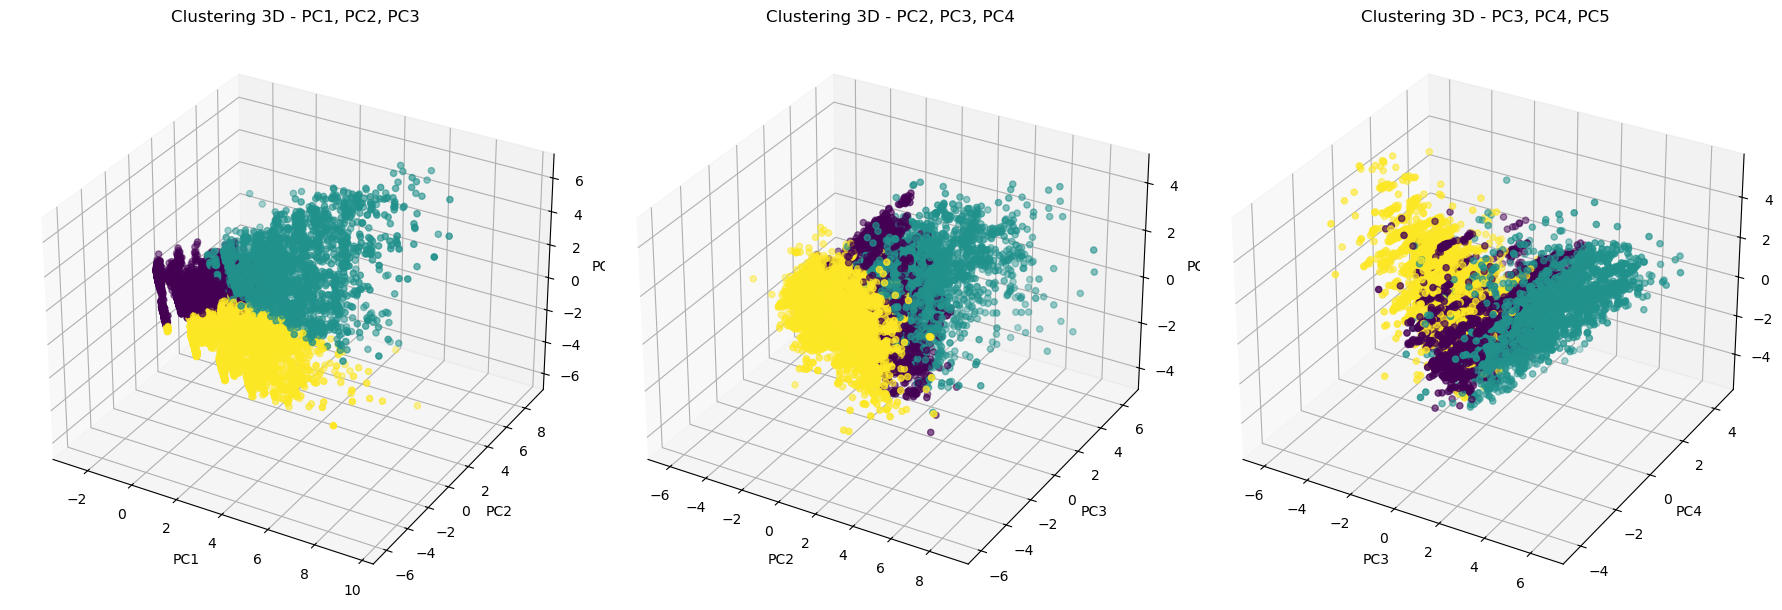

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot clusters in 3D
fig = plt.figure(figsize=(18, 6))

# First plot: PC1, PC2, PC3
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels, cmap='viridis')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('Clustering 3D - PC1, PC2, PC3')

# Second plot: PC2, PC3, PC4
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pca_data[:, 1], pca_data[:, 2], pca_data[:, 3], c=labels, cmap='viridis')
ax2.set_xlabel('PC2')
ax2.set_ylabel('PC3')
ax2.set_zlabel('PC4')
ax2.set_title('Clustering 3D - PC2, PC3, PC4')

# Third plot: PC3, PC4, PC5
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(pca_data[:, 2], pca_data[:, 3], pca_data[:, 4], c=labels, cmap='viridis')
ax3.set_xlabel('PC3')
ax3.set_ylabel('PC4')
ax3.set_zlabel('PC5')
ax3.set_title('Clustering 3D - PC3, PC4, PC5')

plt.tight_layout()
plt.show()

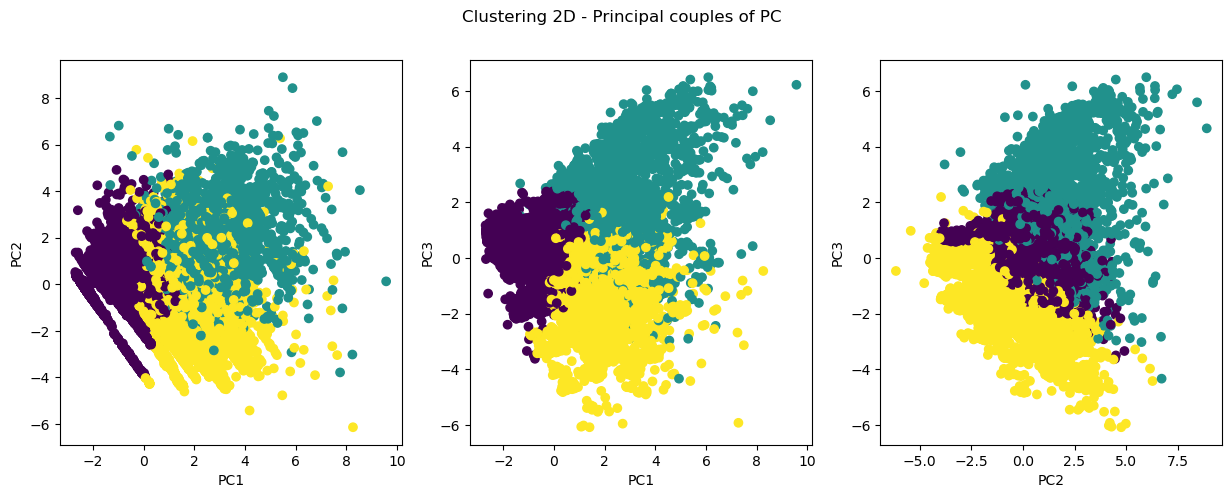

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(data_pca['PC1'], data_pca['PC2'], c=labels, cmap='viridis')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[1].scatter(data_pca['PC1'], data_pca['PC3'], c=labels, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')
axes[2].scatter(data_pca['PC2'], data_pca['PC3'], c=labels, cmap='viridis')
axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')
plt.suptitle('Clustering 2D - Principal couples of PC')
plt.show()

**K-means representations**

These representations try to give us an idea of ​​how our clusters are arranged and differentiated in the dimensions formed by some of the chosen principal components. Surely the data will be subject to distortions, but based on what the various principal components represent, it is interesting to see how the various clusters are arranged. They also seem to be well divided, it is possible to identify the portion of each group, although there is still a small part of noise.

**K-means++**

In [53]:
def kmeans_pp(data, k, max_iter=300, tol=1e-4):
    n_samples, _ = data.shape
    centroids = []

    # Initialize centroids using K-means++
    first_idx = np.random.randint(0, n_samples)
    centroids.append(data[first_idx])

    for _ in range(1, k):
        distances = np.min([np.linalg.norm(data - c, axis=1) ** 2 for c in centroids], axis=0)
        probabilities = distances / distances.sum()
        next_idx = np.random.choice(range(n_samples), p=probabilities)
        centroids.append(data[next_idx])

    centroids = np.array(centroids)

    # Perform K-means clustering
    for _ in range(max_iter):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

# Apply K-means++ to data_pca
k = 3
centroids_pp, labels_pp = kmeans_pp(data_pca.values, k)

# Analyze cluster sizes
from collections import Counter
cluster_counts_pp = Counter(labels_pp)
print("Cluster sizes with K-means++:")
for cluster_id, count in cluster_counts_pp.items():
    print(f"Cluster {cluster_id}: {count} points")

# Print cluster centers
print("\nCluster centers with K-means++:")
print(centroids_pp)


Cluster sizes with K-means++:
Cluster 2: 2879 points
Cluster 1: 17954 points
Cluster 0: 6445 points

Cluster centers with K-means++:
[[ 1.4954     -0.81329567 -1.45131536  0.18215667  0.39128738]
 [-0.95002753  0.05147376  0.1985467  -0.15405229 -0.13922587]
 [ 2.57691605  1.49966335  2.01077456  0.55291946 -0.00770608]]


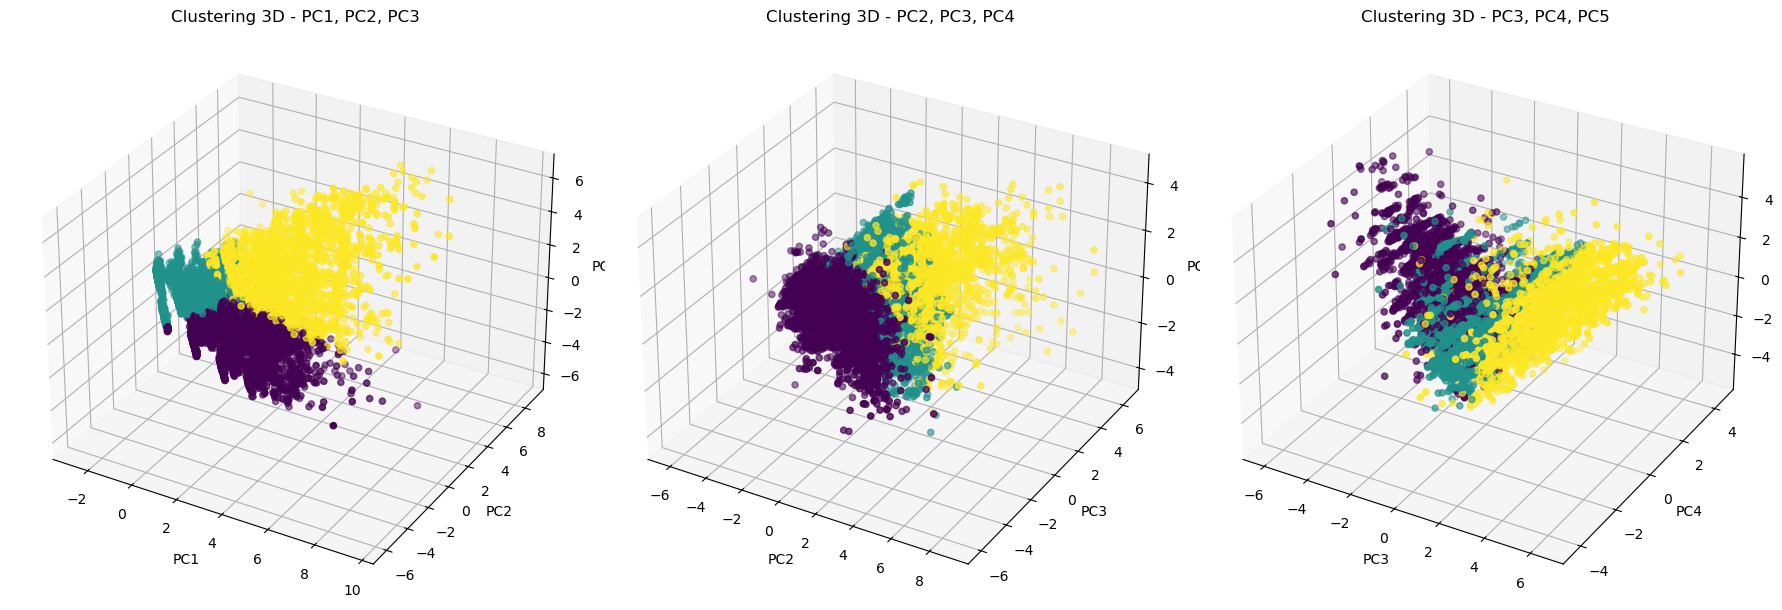

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 6))

# First plot: PC1, PC2, PC3
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels_pp, cmap='viridis')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('Clustering 3D - PC1, PC2, PC3')

# Second plot: PC2, PC3, PC4
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pca_data[:, 1], pca_data[:, 2], pca_data[:, 3], c=labels_pp, cmap='viridis')
ax2.set_xlabel('PC2')
ax2.set_ylabel('PC3')
ax2.set_zlabel('PC4')
ax2.set_title('Clustering 3D - PC2, PC3, PC4')

# Third plot: PC3, PC4, PC5
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(pca_data[:, 2], pca_data[:, 3], pca_data[:, 4], c=labels_pp, cmap='viridis')
ax3.set_xlabel('PC3')
ax3.set_ylabel('PC4')
ax3.set_zlabel('PC5')
ax3.set_title('Clustering 3D - PC3, PC4, PC5')

plt.tight_layout()
plt.show()

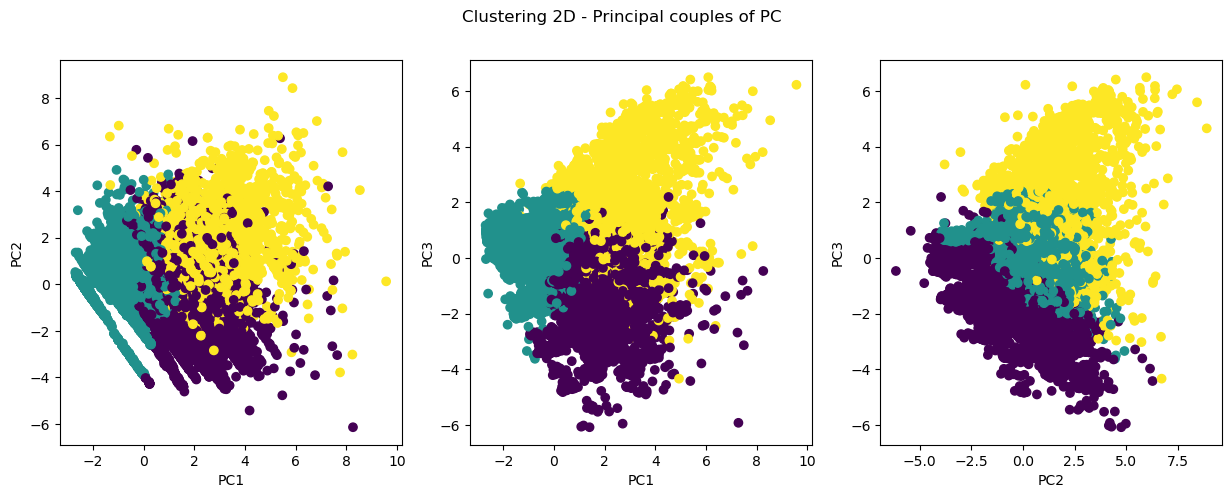

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(data_pca['PC1'], data_pca['PC2'], c=labels_pp, cmap='viridis')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[1].scatter(data_pca['PC1'], data_pca['PC3'], c=labels_pp, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC3')
axes[2].scatter(data_pca['PC2'], data_pca['PC3'], c=labels_pp, cmap='viridis')
axes[2].set_xlabel('PC2')
axes[2].set_ylabel('PC3')
plt.suptitle('Clustering 2D - Principal couples of PC')
plt.show()

**K-means++ representations**

Very similar to the K-means representation, probably there is just a slightly more high presence of noises.

The cluster sizes remain the same, indicating that both methods arrived at the same distribution of points across clusters.


The cluster centers for K-means++ differ from those of regular K-means. This is due to the difference in initialization methods. In K-means++, the initial centers are selected to minimize the likelihood of a poor choice of starting points, which typically leads to more stable and optimal results.
Regular K-means uses random initialization, which can lead to varying results across different runs.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

1. The algorithm uses two main parameters:

* eps (epsilon): the maximum distance between two points for them to be considered in the same cluster.
* min_samples: the minimum number of points required within the eps radius for a point to be considered a "core" point.

2. Points are categorized into three types:

* Core points: have at least min_samples neighbors within the eps radius.

* Border points: are within the eps radius of a core point but do not themselves have enough neighbors to be considered core points.

* Noise points: do not belong to any cluster and are considered outliers.

3. Clusters are formed around core points. Border points are assigned to the nearest cluster. Noise points remain unclustered.

**Advantages of DBSCAN:**

* Works well with clusters of arbitrary shapes.
* Handles noise (outliers) effectively.
* Does not require specifying the number of clusters in advance.

**Disadvantages of DBSCAN:**

* Sensitive to the choice of eps and min_samples parameters.
* Struggles with high-dimensional data (due to increased computational complexity).

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Set DBSCAN parameters
eps_value = 0.5
min_samples_value = 5

# Apply DBSCAN to data_pca
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(data_pca.values)

# Analyze results
unique_clusters = np.unique(dbscan_labels)
print(f"Number of clusters (including noise): {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

# Silhouette score
if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(data_pca.values[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Average silhouette score (excluding noise): {silhouette_avg:.3f}")
else:
    print("Silhouette score not applicable (only one cluster).")

# Cluster sizes
from collections import Counter
cluster_counts = Counter(dbscan_labels)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} points")


Number of clusters (including noise): 271
Cluster labels: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 2

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Set DBSCAN parameters
eps_value = 1.0
min_samples_value = 5

# Apply DBSCAN to data_pca
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(data_pca.values)

# Analyze results
unique_clusters = np.unique(dbscan_labels)
print(f"Number of clusters (including noise): {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

# Silhouette score
if len(unique_clusters) > 1:
    silhouette_avg = silhouette_score(data_pca.values[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Average silhouette score (excluding noise): {silhouette_avg:.3f}")
else:
    print("Silhouette score not applicable (only one cluster).")

# Cluster sizes
from collections import Counter
cluster_counts = Counter(dbscan_labels)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} points")


Number of clusters (including noise): 54
Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52]
Average silhouette score (excluding noise): -0.291
Cluster -1: 807 points
Cluster 0: 25334 points
Cluster 1: 27 points
Cluster 2: 23 points
Cluster 26: 21 points
Cluster 3: 7 points
Cluster 6: 15 points
Cluster 4: 9 points
Cluster 5: 9 points
Cluster 7: 176 points
Cluster 8: 6 points
Cluster 9: 22 points
Cluster 42: 6 points
Cluster 13: 8 points
Cluster 10: 10 points
Cluster 11: 8 points
Cluster 12: 105 points
Cluster 14: 144 points
Cluster 38: 12 points
Cluster 15: 22 points
Cluster 16: 15 points
Cluster 17: 16 points
Cluster 18: 29 points
Cluster 19: 40 points
Cluster 20: 89 points
Cluster 21: 27 points
Cluster 22: 7 points
Cluster 25: 10 points
Cluster 23: 19 points
Cluster 24: 29 points
Cluster 27: 9 points
Cluster 28: 27 points
Cluster 29: 8 points
Cluster 30: 1

### **2.4 Best Algorithm**

In [27]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Inertia calculation
def calculate_inertia(data, labels, centers):
    inertia = 0
    for i, center in enumerate(centers):
        cluster_points = data[labels == i]
        inertia += np.sum((cluster_points - center) ** 2)
    return inertia

# K-means Results
print("K-means Results:")
data_array = data_pca.values  # Convert DataFrame to NumPy array
inertia_kmeans = calculate_inertia(data_array, labels, centers)
silhouette_kmeans = silhouette_score(data_array, labels)
davies_bouldin_kmeans = davies_bouldin_score(data_array, labels)
print(f"Inertia for K-means: {inertia_kmeans}")
print(f"Silhouette Score for K-means: {silhouette_kmeans}")
print(f"Davies-Bouldin Index for K-means: {davies_bouldin_kmeans}")

# K-means++ Results
print("\nK-means++ Results:")
inertia_kmeans_pp = calculate_inertia(data_array, labels_pp, centroids_pp)
silhouette_kmeans_pp = silhouette_score(data_array, labels_pp)
davies_bouldin_kmeans_pp = davies_bouldin_score(data_array, labels_pp)
print(f"Inertia for K-means++: {inertia_kmeans_pp}")
print(f"Silhouette Score for K-means++: {silhouette_kmeans_pp}")
print(f"Davies-Bouldin Index for K-means++: {davies_bouldin_kmeans_pp}")

# DBSCAN Results
print("\nDBSCAN Results:")
unique_clusters = np.unique(dbscan_labels)
if len(unique_clusters) > 1:  # Check if DBSCAN found multiple clusters
    silhouette_dbscan = silhouette_score(data_array[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    davies_bouldin_dbscan = davies_bouldin_score(data_array[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
    print(f"Davies-Bouldin Index for DBSCAN: {davies_bouldin_dbscan}")
else:
    silhouette_dbscan = None
    davies_bouldin_dbscan = None
    print("Silhouette Score and Davies-Bouldin Index are not applicable for DBSCAN (only one cluster detected).")

# Summary of Results
print("\nSummary of Clustering Metrics:")
print(f"K-means:\n - Inertia: {inertia_kmeans}\n - Silhouette Score: {silhouette_kmeans}\n - Davies-Bouldin Index: {davies_bouldin_kmeans}")
print(f"K-means++:\n - Inertia: {inertia_kmeans_pp}\n - Silhouette Score: {silhouette_kmeans_pp}\n - Davies-Bouldin Index: {davies_bouldin_kmeans_pp}")
if silhouette_dbscan is not None:
    print(f"DBSCAN:\n - Silhouette Score: {silhouette_dbscan}\n - Davies-Bouldin Index: {davies_bouldin_dbscan}")
else:
    print("DBSCAN metrics are not available due to insufficient clustering.")

# Cluster Size Distribution
from collections import Counter
print("\nCluster Size Distribution:")
print("K-means:", Counter(labels))
print("K-means++:", Counter(labels_pp))
print("DBSCAN:", Counter(dbscan_labels))


K-means Results:
Inertia for K-means: 769611.9286143152
Silhouette Score for K-means: 0.48521663600519316
Davies-Bouldin Index for K-means: 0.6326445101561615

K-means++ Results:
Inertia for K-means++: 782496.5385626754
Silhouette Score for K-means++: 0.5312540566262045
Davies-Bouldin Index for K-means++: 0.5820798862006672

DBSCAN Results:
Silhouette Score for DBSCAN: 0.3024158305883761
Davies-Bouldin Index for DBSCAN: 1.016658469570041

Summary of Clustering Metrics:
K-means:
 - Inertia: 769611.9286143152
 - Silhouette Score: 0.48521663600519316
 - Davies-Bouldin Index: 0.6326445101561615
K-means++:
 - Inertia: 782496.5385626754
 - Silhouette Score: 0.5312540566262045
 - Davies-Bouldin Index: 0.5820798862006672
DBSCAN:
 - Silhouette Score: 0.3024158305883761
 - Davies-Bouldin Index: 1.016658469570041

Cluster Size Distribution:
K-means: Counter({2: 10954, 1: 10074, 3: 4886, 0: 1364})
K-means++: Counter({1: 16388, 0: 7200, 3: 3032, 2: 658})
DBSCAN: Counter({-1: 10565, 1: 249, 44: 242,

Clustering is a powerful tool to identify natural groupings within data. In this section, we evaluated the quality of clustering results using three algorithms: K-means, K-means++, and DBSCAN. Our goal was to determine the most suitable algorithm for the given dataset. Below are the detailed steps, metrics, and analysis:

---

#### **Optimal Number of Clusters (\( k_{opt} \))**
Based on the results from the Elbow Method and Silhouette Analysis in section 2.3, we determined that the optimal number of clusters for K-means and K-means++ is \( k_opt = 4 \).

For DBSCAN, the optimal parameters were identified as:
- \( eps = 1 )
- \( min\_samples = 5 )

These parameters were used to compare the three clustering methods.


#### **Metrics for Evaluating Clustering Quality**
We used the following metrics to assess the quality of clustering:
1. **Inertia**: The sum of squared distances from points to the cluster centers. Lower values indicate more compact clusters.
2. **Silhouette Score**: Measures how well clusters are separated and how similar points are within the same cluster. Higher values indicate better-defined clusters.
3. **Davies-Bouldin Index (DBI)**: Reflects the average similarity between each cluster and the one most similar to it. Lower values are better.
4. **Cluster Size Distribution**: Examines the balance in cluster sizes. Balanced clusters are generally desirable unless the data has inherent imbalances.


#### **Applying and Evaluating the Algorithms**

##### **1. K-means**
- **Number of clusters**: 4 (predefined as \( k_opt \)).
- **Metrics**:
  - **Inertia**: 769,611.93
  - **Silhouette Score**: 0.485
  - **Davies-Bouldin Index**: 0.633
- **Cluster sizes**:
  - Cluster 0: 1,364 points
  - Cluster 1: 10,074 points
  - Cluster 2: 10,954 points
  - Cluster 3: 4,886 points
- **Observations**:
  - Clusters are moderately well-separated with a balanced distribution.
  - Silhouette Score indicates moderately good separation and compactness.


##### **2. K-means++**
- **Number of clusters**: 4 (predefined as \( k_opt \)).
- **Metrics**:
  - **Inertia**: 782,496.54
  - **Silhouette Score**: 0.531
  - **Davies-Bouldin Index**: 0.582
- **Cluster sizes**:
  - Cluster 0: 7,200 points
  - Cluster 1: 16,388 points
  - Cluster 2: 658 points
  - Cluster 3: 3,032 points
- **Observations**:
  - K-means++ achieved better initialization compared to K-means, leading to slightly better compactness and separation.
  - Cluster sizes are more imbalanced compared to K-means.


##### **3. DBSCAN**
- **Number of clusters**: 31 (including noise).
- **Metrics**:
  - **Silhouette Score**: 0.302
  - **Davies-Bouldin Index**: 1.017
- **Cluster sizes**:
  - Dominant Cluster 0: 24,194 points
  - Noise (-1): 2,772 points
  - Remaining clusters: Mostly small, with less than 100 points each.
- **Observations**:
  - DBSCAN identified one dominant cluster and many smaller ones, indicating it is not well-suited for this dataset.
  - The negative silhouette score suggests overlapping or poorly separated clusters.
  - DBSCAN’s performance is sensitive to parameter selection.


#### **Comparing Results**

| Algorithm    | Inertia    | Silhouette Score | Davies-Bouldin Index | Number of Clusters | Dominant Cluster Size | Observations                                     |
|--------------|------------|------------------|-----------------------|---------------------|-----------------------|-------------------------------------------------|
| **K-means**  | 769,611.93 | 0.485            | 0.633                 | 4                   | 10,954 points         | Balanced clusters, moderately good separation. |
| **K-means++**| 782,496.54 | 0.531            | 0.582                 | 4                   | 16,388 points         | Faster convergence, more imbalanced clusters.  |
| **DBSCAN**   | N/A        | 0.302            | 1.017                 | 31                  | 24,194 points         | Poor separation, unsuitable for this dataset.  |


#### **Conclusion**
Based on the evaluation:
1. **K-means++** emerged as the most suitable algorithm, achieving the highest Silhouette Score and lowest Davies-Bouldin Index, indicating well-defined and compact clusters.
2. **K-means** performed slightly worse than K-means++ but produced more balanced clusters, making it a viable alternative depending on the application.
3. **DBSCAN** struggled with the dataset, identifying one dominant cluster and many small, poorly separated clusters. This method is unsuitable for this dataset without significant parameter tuning.

Overall, **K-means++** is recommended for its superior clustering quality, but **K-means** may be preferred if cluster balance is critical. DBSCAN is not recommended for this dataset.
